<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ?
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [2]:
#Importation des librairies Pandas & Numpy & Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [4]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [5]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [71]:
#Consulter le nombre de colonnes
len(population.axes[1])
#La nature des données dans chacune des colonnes
population.dtypes
#Le nombre de valeurs présentes dans chacune des colonnes
population.count()

Zone          1416
Année         1416
Population    1416
dtype: int64

In [7]:
#Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [8]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] = round(population['Valeur'] * 1000, 0)

In [9]:
#changement du nom de la colonne Valeur par Population
population = population.rename(columns={'Valeur': 'Population'})

In [10]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [11]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [12]:
#Consulter le nombre de colonnes
len(dispo_alimentaire.axes[1])

18

In [13]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [14]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace=True)

In [15]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
dispo_alimentaire.iloc[:, 3:5] = dispo_alimentaire.iloc[:, 3:5] * 1000000
dispo_alimentaire.iloc[:, 9:] = dispo_alimentaire.iloc[:, 9:] * 1000000

In [16]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [17]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [18]:
#Consulter le nombre de colonnes
len(aide_alimentaire.axes[1])

4

In [19]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [20]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire = aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'})

In [21]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur'] * 1000

In [22]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [23]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [24]:
#Consulter le nombre de colonnes
len(sous_nutrition.axes[1])

3

In [25]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [26]:
#Conversion de la colonne sous nutrition en numérique
#Les valeurs <0.1 ont été remplacées par des NaN
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')

In [27]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition.fillna(0, inplace=True)

In [28]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition = sous_nutrition.rename(columns={'Valeur': 'sous_nutrition'})

In [29]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition'] = sous_nutrition['sous_nutrition'] * 1000000

In [30]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [31]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
# obtenir le data frame du nombre de personnes en sous_nutrition par pays pour l'année 2016-2018
sous_nutrition_2017 = sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018', :].reset_index(drop=True)
sous_nutrition_2017 = sous_nutrition_2017.drop('Année', axis=1)
# obtenir le data frame de la population par pays en 2017
population_2017 = population.loc[population['Année'] == 2017, :].reset_index(drop=True)
# vérifier nombre de lignes par df ()
population_2017.shape[0] #236
sous_nutrition_2017.shape[0] #203
# on fusionne les deux tables
pop_sous_nutrition_2017 = pd.merge(population_2017, sous_nutrition_2017, on='Zone', how='right')
# remplacement des NaN par des 0
pop_sous_nutrition_2017.fillna(0, inplace=True)

In [32]:
#Affichage du dataset
pop_sous_nutrition_2017.head()

,Zone,Année,Population,sous_nutrition
0,Afghanistan,2017,36296113.0,10500000.0
1,Afrique du Sud,2017,57009756.0,3100000.0
2,Albanie,2017,2884169.0,100000.0
3,Algérie,2017,41389189.0,1300000.0
4,Allemagne,2017,82658409.0,0.0


In [33]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
print("{} millions de personnes étaient en état de sous nutrition dans le monde en 2017.".format(round(pop_sous_nutrition_2017.iloc[:,3].sum()/1000000,1)))

#Calcul et affichage du taux de personnes en état de sous nutrition
print("{} % des humains étaient en état de sous nutrition dans le monde en 2017.".format(round((pop_sous_nutrition_2017.iloc[:,3].sum() / pop_sous_nutrition_2017.iloc[:,2].sum())*100, 2)))

535.7 millions de personnes étaient en état de sous nutrition dans le monde en 2017.
7.1 % des humains étaient en état de sous nutrition dans le monde en 2017.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [34]:
#Combien mange en moyenne un être humain ? moyenne de 2100 (femmes) et 2600 (hommes) Source => https://www.anses.fr/en/system/files/NUT2012SA0103Ra-2.pdf
# deuxième source pour consommation moyenne effective : https://www.fao.org/economic/the-statistics-division-ess/chartroom-and-factoids/chartroom/93-world-calories-total/en/#:~:text=Today%2C%20an%20%22average%22%20man,the%20rest%20being%20left%20to
conso_calories_jour = 2350
print("Un être humain consomme en moyenne {} calories par jour.".format(conso_calories_jour))

Un être humain consomme en moyenne 2350 calories par jour.


In [35]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
#On crée un df population pour 2017
population_2017 = population.loc[population['Année'] == 2017, :].reset_index(drop=True)
population_2017 = population_2017.drop("Année", axis='columns')
#On fait la jointure avec ce nouveau df
dispo_alimentaire_2017 = pd.merge(population_2017, dispo_alimentaire, on="Zone", how='right')
dispo_alimentaire_2017.fillna(0, inplace=True)

In [36]:
#Affichage du nouveau dataframe
dispo_alimentaire_2017.head()

,Zone,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
dispo_alimentaire_monde = 0
for i in dispo_alimentaire_2017.index:
    dispo_alimentaire_monde += dispo_alimentaire_2017['Disponibilité alimentaire (Kcal/personne/jour)'][i] * dispo_alimentaire_2017['Population'][i]

print("Le monde a produit {} billions de Kcal par jour en 2017.".format(round(dispo_alimentaire_monde/1000000000000,2)))

Le monde a produit 20.92 billions de Kcal par jour en 2017.


In [38]:
#Calcul du nombre d'humains pouvant être nourris
population_monde = 0
for i in population.index :
    if population['Année'][i] == 2017 :
        population_monde += population['Population'][i]
print('Il y avait {} milliards d\'êtres humains sur Terre en 2017.'.format(round(population_monde/1000000000,2)))

print('En 2017, la planète produisait suffisamment de ressources pour nourrir {} milliards d\'êtres humains, soit {} % de la population.'.format(round((dispo_alimentaire_monde / conso_calories_jour)/1000000000,2),round((dispo_alimentaire_monde / conso_calories_jour)/population_monde*100,2)))

Il y avait 7.55 milliards d'êtres humains sur Terre en 2017.
En 2017, la planète produisait suffisamment de ressources pour nourrir 8.9 milliards d'êtres humains, soit 117.93 % de la population.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [39]:
#Transfert des données avec les végétaux dans un nouveau dataframe
dispo_alimentaire_2017.head()

,Zone,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#Calcul du nombre de kcal disponible pour les végétaux
dispo_alimentaire_veg = 0
for i in dispo_alimentaire_2017.index:
    if dispo_alimentaire_2017['Origine'][i] == "vegetale":
        dispo_alimentaire_veg += dispo_alimentaire_2017['Disponibilité alimentaire (Kcal/personne/jour)'][i] * dispo_alimentaire_2017['Population'][i]

print("Le monde a produit {} billions de Kcal par jour avec les végétaux en 2017.".format(round(dispo_alimentaire_veg/1000000000000,2)))

Le monde a produit 17.26 billions de Kcal par jour avec les végétaux en 2017.


In [41]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
print('Il y avait {} milliards d\'êtres humains sur Terre en 2017.'.format(round(population_monde/1000000000,2)))

print('En 2017, la planète produisait suffisamment de ressources d\'origine végétale pour nourrir {} milliards d\'êtres humains, soit {} % de la population.'.format(round((dispo_alimentaire_veg / conso_calories_jour)/1000000000,2),round((dispo_alimentaire_veg / conso_calories_jour)/population_monde*100,2)))

Il y avait 7.55 milliards d'êtres humains sur Terre en 2017.
En 2017, la planète produisait suffisamment de ressources d'origine végétale pour nourrir 7.35 milliards d'êtres humains, soit 97.31 % de la population.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [42]:
#Calcul de la disponibilité totale
#disponibilités totales = Production + importations + baisses des stocks
#disponibilité intérieure = Production + importations - exportations + variations des stocks (baisse ou augmentation)
#= Semences + Pertes + Aliments pour animaux + Nourriture + Traitement + Autres utilisations
dispo_alimentaire['Disponibilité totale'] = 0
for i in dispo_alimentaire.index:
    if dispo_alimentaire['Variation de stock'][i] < 0:
        dispo_alimentaire['Disponibilité totale'][i] = dispo_alimentaire['Importations - Quantité'][i] + dispo_alimentaire['Production'][i] + dispo_alimentaire['Variation de stock'][i]
    else:
        dispo_alimentaire['Disponibilité totale'][i] = dispo_alimentaire['Importations - Quantité'][i] + dispo_alimentaire['Production'][i]

dispo_interieure_totale = dispo_alimentaire.iloc[:,9].sum()
dispo_alimentaire.head()

<ipython-input-42-7fd94c1265e8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dispo_alimentaire['Disponibilité totale'][i] = dispo_alimentaire['Importations - Quantité'][i] + dispo_alimentaire['Production'][i]
<ipython-input-42-7fd94c1265e8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dispo_alimentaire['Disponibilité totale'][i] = dispo_alimentaire['Importations - Quantité'][i] + dispo_alimentaire['Production'][i] + dispo_alimentaire['Variation de stock'][i]


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité totale
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,53000000
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,43000000
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2000000
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,82000000


In [43]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures,
aliments = ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations']
print('La disponibilité intérieure mondiale en 2017 était d\'environ {} milliards de tonnes.'.format(round(dispo_interieure_totale/1000000000000, 2)))
for i in aliments:
    print('En 2017, à l\'échelle mondiale, la proportion du segment \'{}\' par rapport à la disponibilité intérieure était de {} %.'.format(i.lower(), round((dispo_alimentaire.iloc[:,dispo_alimentaire.columns.get_loc(i)].sum()*100) / (dispo_interieure_totale),2)))


La disponibilité intérieure mondiale en 2017 était d'environ 9.85 milliards de tonnes.
En 2017, à l'échelle mondiale, la proportion du segment 'aliments pour animaux' par rapport à la disponibilité intérieure était de 13.24 %.
En 2017, à l'échelle mondiale, la proportion du segment 'pertes' par rapport à la disponibilité intérieure était de 4.61 %.
En 2017, à l'échelle mondiale, la proportion du segment 'nourriture' par rapport à la disponibilité intérieure était de 49.51 %.
En 2017, à l'échelle mondiale, la proportion du segment 'semences' par rapport à la disponibilité intérieure était de 1.57 %.
En 2017, à l'échelle mondiale, la proportion du segment 'traitement' par rapport à la disponibilité intérieure était de 22.38 %.
En 2017, à l'échelle mondiale, la proportion du segment 'autres utilisations' par rapport à la disponibilité intérieure était de 8.78 %.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [44]:
#Création d'une liste avec toutes les variables
liste_brute = ['blé', 'orge', 'maïs', 'riz (eq blanchi)', 'seigle', 'avoine', 'millet', 'sorgho', 'céréales, autres']
liste_cereales = []
for i in dispo_alimentaire.index:
    if dispo_alimentaire['Produit'][i].lower() in liste_brute and dispo_alimentaire['Produit'][i] not in liste_cereales:
        liste_cereales.append(dispo_alimentaire['Produit'][i])

liste_cereales

['Blé',
 'Céréales, Autres',
 'Maïs',
 'Millet',
 'Orge',
 'Riz (Eq Blanchi)',
 'Avoine',
 'Seigle',
 'Sorgho']

In [45]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
dispo_alimentaire_cereales = dispo_alimentaire.loc[dispo_alimentaire['Produit'].isin(liste_cereales), :].reset_index(drop=True)
dispo_alimentaire_cereales.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité totale
0,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0,5992000000
1,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0
2,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0,313000000
3,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0,13000000
4,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0,524000000


In [46]:
#Affichage de la proportion d'alimentation humaine (selon disponibilité intérieure)
#disponibilité intérieure = Semences + Pertes + Aliments pour animaux + Nourriture + Traitement + Autres utilisations
alimentation_humaine_cereale = round((dispo_alimentaire_cereales.iloc[:,12].sum()) / (dispo_alimentaire_cereales.iloc[:,9].sum())*100,2)
print('{} % des céréales disponibles dans le monde étaient destinées aux humains en 2017.'.format(alimentation_humaine_cereale))

42.75 % des céréales disponibles dans le monde étaient destinées aux humains en 2017.


In [47]:
#Affichage de la proportion d'alimentation animale (selon disponibilité intérieure)
alimentation_animaux_cereale = round((dispo_alimentaire_cereales.iloc[:,3].sum()) / (dispo_alimentaire_cereales.iloc[:,9].sum())*100,2)
print('{} % des céréales disponibles dans le monde étaient destinées aux animaux en 2017.'.format(alimentation_animaux_cereale))
print('Les {} % restants non consommés par les animaux ou les humains étaient destinés aux semences, au traitement, aux autres utilisations ou bien aux pertes.'.format(100-alimentation_humaine_cereale-alimentation_animaux_cereale))

36.29 % des céréales disponibles dans le monde étaient destinées aux animaux en 2017.
Les 20.96 % restants non consommés par les animaux ou les humains étaient destinés aux semences, au traitement, aux autres utilisations ou bien aux pertes.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [48]:
#Création de la colonne proportion par pays
# ajout d'une colonne taux de sous_nutrition
pop_sous_nutrition_2017['taux'] = round((pop_sous_nutrition_2017['sous_nutrition'] / pop_sous_nutrition_2017['Population'])*100,2)
pop_sous_nutrition_2017.head()

,Zone,Année,Population,sous_nutrition,taux
0,Afghanistan,2017,36296113.0,10500000.0,28.93
1,Afrique du Sud,2017,57009756.0,3100000.0,5.44
2,Albanie,2017,2884169.0,100000.0,3.47
3,Algérie,2017,41389189.0,1300000.0,3.14
4,Allemagne,2017,82658409.0,0.0,0.00


(20.0, 50.0)

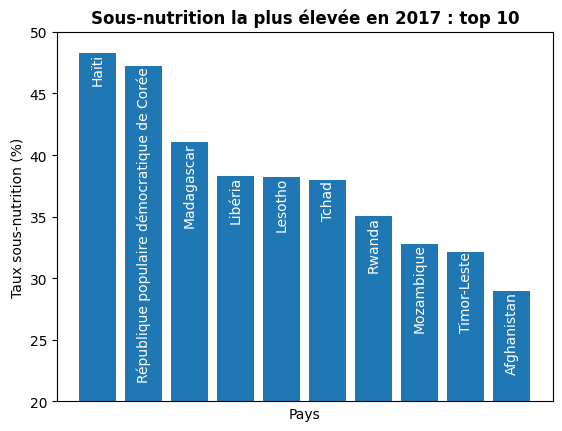

In [49]:
#affichage après tri des 10 pires pays
#création df avec top 10 pire pays uniquement
top_10_pays_sous_nutrition = pop_sous_nutrition_2017.sort_values('taux', ascending=False).iloc[:10,:].reset_index(drop=True)
#création diagramme à barres
plt.bar(height=top_10_pays_sous_nutrition['taux'], x=top_10_pays_sous_nutrition['Zone'])
plt.title('Sous-nutrition la plus élevée en 2017 : top 10', fontweight='bold')
plt.xlabel('Pays')
plt.xticks([])
plt.ylabel('Taux sous-nutrition (%)')
for index, value in enumerate(top_10_pays_sous_nutrition['taux']):
    plt.text(index, value, str(top_10_pays_sous_nutrition['Zone'][index]), ha='center', va='top', rotation='vertical', color='white')
plt.ylim([20, 50])

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [50]:
#Division de la colonne Aide_alimentaire qui contient des kg par 1,000,000 pour avoir des milliers de tonnes
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur'] / 1000000
#calcul du total de l'aide alimentaire par pays
aide_alimentaire_totale = aide_alimentaire.groupby('Zone')['Valeur'].sum().sort_values(ascending=False)
aide_alimentaire_totale = aide_alimentaire_totale.reset_index()
aide_alimentaire_totale.head()

,Zone,Valeur
0,République arabe syrienne,1858.943
1,Éthiopie,1381.294
2,Yémen,1206.484
3,Soudan du Sud,695.248
4,Soudan,669.784


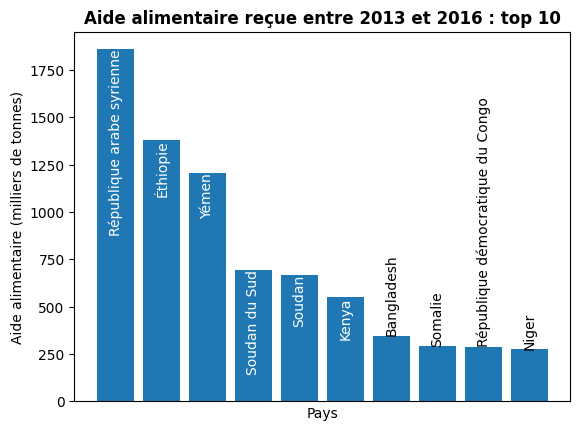

In [51]:
#affichage après tri des 10 pays qui ont bénéficié le plus de l'aide alimentaire
#création df avec top 10 pire pays uniquement
top_10_pays_aide_alimentaire = aide_alimentaire_totale.iloc[:10,:].reset_index(drop=True)
#création diagramme à barres
plt.bar(height=top_10_pays_aide_alimentaire['Valeur'], x=top_10_pays_aide_alimentaire['Zone'])
plt.title('Aide alimentaire reçue entre 2013 et 2016 : top 10', fontweight='bold')
plt.xlabel('Pays')
plt.ylabel('Aide alimentaire (milliers de tonnes)')
plt.xticks([])
for index, value in enumerate(top_10_pays_aide_alimentaire['Valeur'][:6]):
    plt.text(index, value, str(top_10_pays_aide_alimentaire['Zone'][index]), ha='center', va='top', rotation='vertical', color='white')
for index, value in enumerate(top_10_pays_aide_alimentaire['Valeur'][6:]):
    plt.text(index+6, value, str(top_10_pays_aide_alimentaire['Zone'][index+6]), ha='center', va='bottom', rotation='vertical', color='black')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [52]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire (en milliers de tonnes) puis groupby sur zone et année
aide_alimentaire_par_annee = aide_alimentaire.pivot_table(index='Année', columns='Zone', values='Valeur', aggfunc='sum')
aide_alimentaire_par_annee = aide_alimentaire_par_annee.reset_index()
aide_alimentaire_par_annee.fillna(0, inplace=True)
aide_alimentaire_par_annee.head()

Zone,Année,Afghanistan,Algérie,Angola,Bangladesh,Bhoutan,Bolivie (État plurinational de),Burkina Faso,Burundi,Bénin,...,Tchad,Timor-Leste,Togo,Vanuatu,Yémen,Zambie,Zimbabwe,Égypte,Équateur,Éthiopie
0,2013,128.238,35.234,5.000,131.018,1.724,0.000,18.620,53.372,17.622,...,93.930,0.116,24.804,0.000,264.764,0.328,21.252,1.122,1.362,591.404
1,2014,57.214,18.980,0.014,194.628,0.146,0.006,22.938,11.010,0.672,...,97.926,0.000,0.000,0.000,103.840,2.698,26.600,0.000,0.000,586.624
2,2015,0.000,17.424,0.000,22.542,0.578,0.000,23.182,12.936,3.786,...,73.678,0.000,0.000,0.802,372.306,0.000,14.718,0.000,0.000,203.266
3,2016,0.000,9.476,0.000,0.000,0.218,0.000,0.072,0.000,0.144,...,2.432,0.000,0.000,0.000,465.574,0.000,0.000,0.000,0.000,0.000


In [53]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficié de l'aide alimentaire (milliers de tonnes ?)
top_5_aide_alimentaire = aide_alimentaire_totale.iloc[:5,:].reset_index(drop=True)
liste_5_pays = top_5_aide_alimentaire['Zone'].tolist()
liste_5_pays.append('Année')

In [54]:
#On filtre sur le dataframe avec notre liste
aide_alimentaire_par_annee_5 = aide_alimentaire_par_annee.filter(items=liste_5_pays)
aide_alimentaire_par_annee_5.head()

Zone,République arabe syrienne,Éthiopie,Yémen,Soudan du Sud,Soudan,Année
0,563.566,591.404,264.764,196.330,330.230,2013
1,651.870,586.624,103.840,450.610,321.904,2014
2,524.949,203.266,372.306,48.308,17.650,2015
3,118.558,0.000,465.574,0.000,0.000,2016


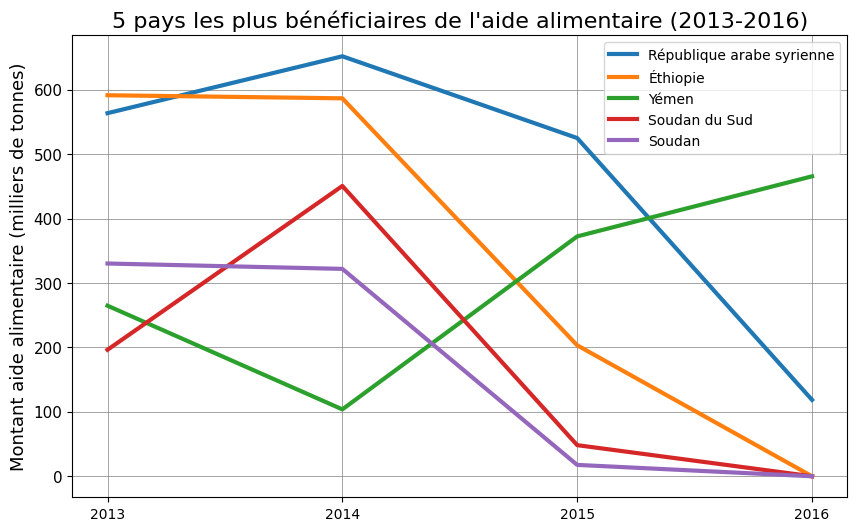

In [55]:
# Affichage des pays avec l'aide alimentaire par année
plt.figure(figsize=(10, 6))
for i in liste_5_pays[:5]:
    plt.plot(aide_alimentaire_par_annee_5['Année'], aide_alimentaire_par_annee_5[i], label=i, linewidth=3)
plt.legend(loc='upper right')
plt.ylabel('Montant aide alimentaire (milliers de tonnes)', fontsize=13)
plt.yticks(fontsize=11)
plt.title("5 pays les plus bénéficiaires de l'aide alimentaire (2013-2016)", fontsize=16)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.xticks(np.arange(2013, 2017, step=1))
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [56]:
#Calcul de la disponibilité en kcal par personne par jour par pays
dispo_alimentaire_par_jour = dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()
dispo_alimentaire_par_jour.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0


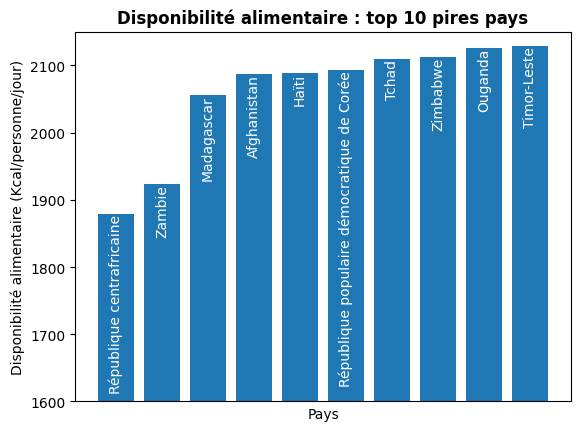

In [57]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne
#création df avec top 10 pire pays uniquement
bottom_10_dispo_alimentaire = dispo_alimentaire_par_jour.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending=True).iloc[:10,:].reset_index(drop=True)
#création diagramme à barres
plt.bar(height=bottom_10_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'], x=bottom_10_dispo_alimentaire['Zone'])
plt.title('Disponibilité alimentaire : top 10 pires pays', fontweight='bold')
plt.xlabel('Pays')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.ylim([1600, 2150])
plt.xticks([])
for index, value in enumerate(bottom_10_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)']):
    plt.text(index, value, str(bottom_10_dispo_alimentaire['Zone'][index]), ha='center', va='top', rotation='vertical', color='white')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

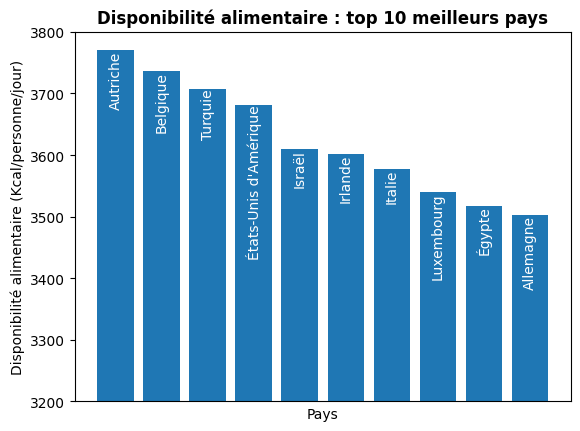

In [58]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne
#création df avec top 10 meilleurs pays uniquement
top_10_dispo_alimentaire = dispo_alimentaire_par_jour.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending=False).iloc[:10,:].reset_index(drop=True)
#création diagramme à barres
plt.bar(height=top_10_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'], x=top_10_dispo_alimentaire['Zone'])
plt.title('Disponibilité alimentaire : top 10 meilleurs pays', fontweight='bold')
plt.xlabel('Pays')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.xticks(rotation='vertical')
plt.ylim([3200, 3800])
plt.xticks([])
for index, value in enumerate(top_10_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)']):
    plt.text(index, value, str(top_10_dispo_alimentaire['Zone'][index]), ha='center', va='top', rotation='vertical', color='white')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [59]:
#création d'un dataframe avec uniquement la Thaïlande
dispo_alimentaire_thai = dispo_alimentaire.loc[dispo_alimentaire['Zone'] == 'Thaïlande', :].reset_index(drop=True)
sous_nutrition_thai = sous_nutrition.loc[sous_nutrition['Zone'] == 'Thaïlande', :].reset_index(drop=True)
population_thai = population.loc[population['Zone'] == 'Thaïlande', :].reset_index(drop=True)
aide_alimentaire_thai = aide_alimentaire.loc[aide_alimentaire['Zone'] == 'Thaïlande', :].reset_index(drop=True)
dispo_alimentaire_thai.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité totale
0,Thaïlande,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,0.56,74000000.0,5.000000e+06,33000000.0,75000000.0,0.0,4.500000e+07,0.0,0.0,0.0,78000000
1,Thaïlande,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,0.00,0.00,8000000.0,6.000000e+06,2000000.0,6000000.0,0.0,1.200000e+07,0.0,2000000.0,0.0,14000000
2,Thaïlande,"Alcool, non Comestible",vegetale,0.0,358000000.0,0.0,0.00,0.00,0.00,358000000.0,1.100000e+08,21000000.0,0.0,0.0,4.470000e+08,0.0,0.0,0.0,468000000
3,Thaïlande,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,0.01,0.08,12000000.0,7.000000e+06,19000000.0,12000000.0,0.0,0.000000e+00,0.0,0.0,0.0,19000000
4,Thaïlande,Ananas,vegetale,0.0,0.0,10.0,10.02,0.04,0.08,782000000.0,1.449000e+09,9000000.0,671000000.0,110000000.0,2.209000e+09,0.0,0.0,13000000.0,2218000000


In [60]:
#Calcul de la sous nutrition en Thaïlande
sous_nutrition_thai['taux'] = round((sous_nutrition_thai['sous_nutrition'] / population_thai['Population'])*100,2)
print('En 2017, {} % de la population thailandaise était en état de sous-nutrition.'.format(sous_nutrition_thai['taux'][4]))

En 2017, 8.96 % de la population thailandaise était en état de sous-nutrition.


In [61]:
# On calcule la proportion exportée (de manioc ?) en fonction de la proportion
dispo_alimentaire_thai_manioc = dispo_alimentaire_thai.loc[dispo_alimentaire_thai['Produit'] == 'Manioc', :]
exports_manioc = dispo_alimentaire_thai_manioc.loc[:,'Exportations - Quantité'].sum()
imports_manioc = dispo_alimentaire_thai_manioc.loc[:,'Importations - Quantité'].sum()
prod_manioc = dispo_alimentaire_thai_manioc.loc[:,'Production'].sum()
dispo_habitant_manioc_thai = round(dispo_alimentaire_thai_manioc.loc[:,'Disponibilité alimentaire (Kcal/personne/jour)'].sum())
dispo_interieure_manioc_thai = round(dispo_alimentaire_thai_manioc.loc[:,'Disponibilité intérieure'].sum())
dispo_alimentaire_totale_thai = round(dispo_alimentaire_thai.iloc[:,5].sum())
conso_manioc_animaux = round((dispo_alimentaire_thai_manioc.iloc[:, 3].sum()) / (dispo_alimentaire_thai.iloc[:, 3].sum())*100,2)

print('En 2017, la production de manioc représentait {} % de la production totale (tous aliments) dans le pays.'. format(round(prod_manioc/dispo_alimentaire_thai.iloc[:,dispo_alimentaire_thai.columns.get_loc('Production')].sum()*100,2)))
print('En 2017, la disponibilité intérieure du manioc représentait {} % de la DI totale (tous aliments) dans le pays.'. format(round(dispo_interieure_manioc_thai/dispo_alimentaire_thai.iloc[:,dispo_alimentaire_thai.columns.get_loc('Disponibilité intérieure')].sum()*100,2)))
print('En 2017, {} % de la production de manioc en Thailande a été exportée.'.format(round((exports_manioc / prod_manioc)*100, 2)))
print('En 2017, {} % de la production de manioc en Thailande a été importée.'.format(round((imports_manioc / prod_manioc)*100, 2)))
print('En 2017, la disponibilité alimentaire du manioc en Thailande était de {} Kcal/personne/jour, alors que la disponibilité par habitant (tous produits) est de {} Kcal/personne/jour.'.format(dispo_habitant_manioc_thai, dispo_alimentaire_totale_thai))
print('En 2017, {} % des aliments pour animaux étaient du manioc.'.format(conso_manioc_animaux))

En 2017, la production de manioc représentait 14.98 % de la production totale (tous aliments) dans le pays.
En 2017, la disponibilité intérieure du manioc représentait 3.96 % de la DI totale (tous aliments) dans le pays.
En 2017, 83.41 % de la production de manioc en Thailande a été exportée.
En 2017, 4.14 % de la production de manioc en Thailande a été importée.
En 2017, la disponibilité alimentaire du manioc en Thailande était de 40 Kcal/personne/jour, alors que la disponibilité par habitant (tous produits) est de 2785 Kcal/personne/jour.
En 2017, 18.83 % des aliments pour animaux étaient du manioc.


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

Text(0, 0.5, 'Taux sous-nutrition (%)')

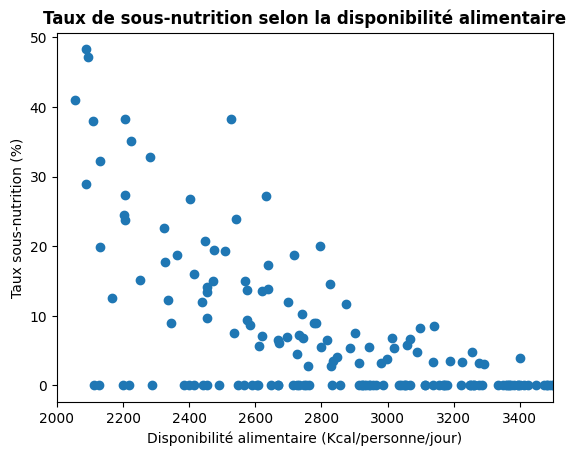

In [62]:
#Rajouter en dessous toutes les analyses complémentaires suite à la demande de Mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être
#le plus en difficulté au niveau alimentaire"
#cas2 : étudier corrélation disponibilité alimentaire / taux sous-nutrition (échelle:monde)
dispo_alimentaire_sous_nutrition = pd.merge(dispo_alimentaire_par_jour, pop_sous_nutrition_2017, on='Zone', how='outer')
dispo_alimentaire_sous_nutrition.fillna(0, inplace=True)
dispo_alimentaire_sous_nutrition.head()
plt.scatter(dispo_alimentaire_sous_nutrition['Disponibilité alimentaire (Kcal/personne/jour)'], dispo_alimentaire_sous_nutrition['taux'])
plt.xlim([2000, 3500])
plt.title('Taux de sous-nutrition selon la disponibilité alimentaire', fontweight='bold')
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.ylabel('Taux sous-nutrition (%)')

In [74]:
#cas2 le blé en Afghanistan
dispo_alimentaire_afghanistan = dispo_alimentaire.loc[dispo_alimentaire['Zone'] == 'Afghanistan', :].reset_index(drop=True)
dispo_alimentaire_afghanistan_ble = dispo_alimentaire_afghanistan.loc[dispo_alimentaire_afghanistan['Produit'] == 'Blé', :]
prod_ble = dispo_alimentaire_afghanistan_ble.loc[:,'Production'].sum()
exports_ble = dispo_alimentaire_afghanistan_ble.loc[:,'Exportations - Quantité'].sum()
imports_ble = dispo_alimentaire_afghanistan_ble.loc[:,'Importations - Quantité'].sum()
dispo_habitant_afghanistan_ble = round(dispo_alimentaire_afghanistan_ble.loc[:,'Disponibilité alimentaire (Kcal/personne/jour)'].sum())
dispo_interieure_afghanistan_ble = round(dispo_alimentaire_afghanistan_ble.loc[:,'Disponibilité intérieure'].sum())
dispo_alimentaire_totale_afghanistan = round(dispo_alimentaire_afghanistan.iloc[:,5].sum())
conso_ble_animaux = round((dispo_alimentaire_afghanistan_ble.iloc[:, 3].sum()) / (dispo_alimentaire_afghanistan.iloc[:, 3].sum())*100,2)
print('En 2017, la production de blé représentait {} % de la production totale (tous aliments) dans tout le pays.'. format(round(prod_ble/dispo_alimentaire_afghanistan.iloc[:,dispo_alimentaire_afghanistan.columns.get_loc('Production')].sum()*100,2)))
print('En 2017, la disponibilité intérieure du blé représentait {} % de la DI totale (tous aliments) dans le pays.'. format(round(dispo_interieure_afghanistan_ble/dispo_alimentaire_afghanistan.iloc[:,dispo_alimentaire_afghanistan.columns.get_loc('Disponibilité intérieure')].sum()*100,2)))
print('En 2017, {} % de la production de blé en Afghanistan a été exportée.'.format(round((exports_ble / prod_ble)*100, 2)))
print('En 2017, {} % de la production de blé en Afghanistan a été importée.'.format(round((imports_ble / prod_ble)*100, 2)))
print('En 2017, la disponibilité alimentaire du blé en Afghanistan était de {} Kcal/personne/jour, alors que la disponibilité par habitant (tous produits) est de {} Kcal/personne/jour.'.format(dispo_habitant_afghanistan_ble, dispo_alimentaire_totale_afghanistan))
print('En 2017, {} % des aliments pour animaux étaient du blé.'.format(conso_ble_animaux))

En 2017, la production de blé représentait 46.27 % de la production totale (tous aliments) dans tout le pays.
En 2017, la disponibilité intérieure du blé représentait 44.34 % de la DI totale (tous aliments) dans le pays.
En 2017, 0.0 % de la production de blé en Afghanistan a été exportée.
En 2017, 22.69 % de la production de blé en Afghanistan a été importée.
En 2017, la disponibilité alimentaire du blé en Afghanistan était de 1369 Kcal/personne/jour, alors que la disponibilité par habitant (tous produits) est de 2087 Kcal/personne/jour.
En 2017, 0.0 % des aliments pour animaux étaient du blé.
